In [17]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import matplotlib.mlab as mlab

Text(0,0.5,'P(X)')

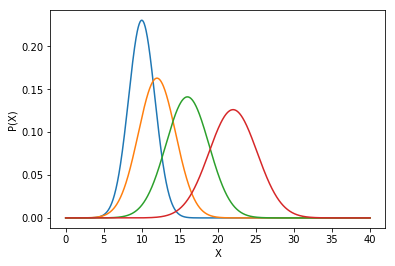

In [18]:
fig1 = plt.figure()
mean = [10,12,16,22,25]
variance = [3,6,8,10,12]

x = np.linspace(0,40,1000)

for i in range(4):
    sigma = np.sqrt(variance[i])
    y = mlab.normpdf(x,mean[i],sigma)
    plt.plot(x,y, label=r'$v_{}$'.format(i+1))

plt.xlabel("X")
plt.ylabel("P(X)") 

In [19]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [20]:
py.iplot_mpl(fig1, strip_style = True)

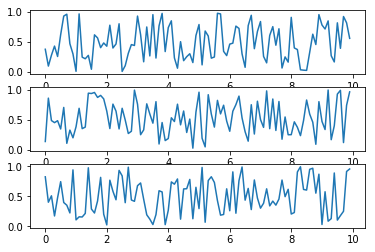

In [21]:
fig1 = plt.figure()

x = np.arange(0,10,.1)


plt.subplot(311)
y = np.random.rand(len(x) )
plt.plot(x, y)
plt.subplot(312)
y = np.random.rand(len(x) )
plt.plot(x, y)
plt.subplot(313)
y = np.random.rand(len(x) )
plt.plot(x, y)


In [22]:
py.iplot_mpl(fig1, strip_style = True)

https://plot.ly/ipython-notebooks/collaboration/

In [23]:
import plotly.graph_objs as go

In [24]:
trace1 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5],
    y=[1.5, 1, 1.3, 0.7, 0.8, 0.9]
)
trace2 = go.Bar(
    x=[0, 1, 2, 3, 4, 5],
    y=[1, 0.5, 0.7, -1.2, 0.3, 0.4]
)

data = [trace1, trace2]
py.iplot(data, filename='bar-line')

In [89]:
xx = np.arange(-10,10,.1)
yy = xx
X,Y = np.meshgrid(xx,yy)

Z = X**2 + Y**2
Z2 = X

In [162]:
data = [
    go.Surface(
        z=Z
    )
]

py.iplot(data)

In [89]:
xx = np.arange(-10,10,.1)
yy = xx
X,Y = np.meshgrid(xx,yy)

Z = X**2 + Y**2
Z2 = X

In [162]:

data = [
    go.Surface(
        z=Z
    )
]

#py.iplot(data)

## Codigo que no funciona muy bien

In [160]:
axis = dict(
showbackground=True, 
backgroundcolor="rgb(230, 230,230)", 
showgrid=False,    
zeroline=False,  
showline=False)
ztickvals=np.arange(-6,4)

layout = go.Layout(title="Projections of a surface onto coordinate planes" , 
                autosize=False,
                width=700,
                height=600,
                scene=go.Scene(xaxis=go.XAxis(axis, range=[-3.5, 3.5]),
                            yaxis=go.YAxis(axis, range=[-3.5, 3.5]),
                            zaxis=go.ZAxis(axis , tickvals=ztickvals),
                            aspectratio=dict(x=1,
                                             y=1,
                                             z=0.95)
                           )
                )

In [161]:
tracex =go.Surface(z=Z,
                x=xx,
                y=yy,
                showlegend=False,
                showscale=False,
                hoverinfo='text'
               )
tracey =go.Surface(z=Z2,
                x=xx,
                y=yy,
                showlegend=False,
                showscale=False,
                hoverinfo='text'
               )
data=go.Data([tracex, tracey])
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [123]:
len(X.squeeze()),X.shape,len( np.ravel(X) )

(200, (200, 200), 40000)

In [128]:
trace1 = go.Surface(
    z=Z,
    y=yy,
    x=xx,
#    ncontours=30,
#    showscale=False
)
trace2 = go.Scatter3d(
    x=np.ravel(X),
    y=np.ravel(Y),
    mode='markers+lines',
    name='steepest',
    line=dict(
        color='black'
    )
)

data = [trace1, trace2]
py.iplot(data, filename='contour-scatter')

# A Contour and Scatter Plot of the Method of Steepest Descent

In [60]:
import json
import six.moves.urllib
from urllib.request import urlopen

In [ ]:
from urllib.request import urlopen
#HTML(urlopen('http://bit.ly/1Bf5Hft').read().decode("utf-8"))

In [67]:
response = six.moves.urllib.request.urlopen('https://raw.githubusercontent.com/plotly/datasets/master/steepest.json')
#datas = response.read().decode("utf-8")
data = json.loads(response.read().decode("utf-8"))


In [68]:
response = urlopen('https://raw.githubusercontent.com/plotly/datasets/master/steepest.json')
#data = json.loads(response.read().decode("utf-8"))

In [69]:
trace1 = go.Contour(
    z=data['contour_z'][0],
    y=data['contour_y'][0],
    x=data['contour_x'][0],
    ncontours=30,
    showscale=False
)
trace2 = go.Scatter(
    x=data['trace_x'],
    y=data['trace_y'],
    mode='markers+lines',
    name='steepest',
    line=dict(
        color='black'
    )
)

data = [trace1, trace2]
py.iplot(data, filename='contour-scatter')


https://medium.com/@plotlygraphs/7-plotly-graphs-in-3d-stocks-cats-and-lakes-d8a27bd5650f

# 3D Line Plot of Brownian Motion

In [136]:
#import plotly.plotly as py
#import plotly.graph_objs as go
import pandas as pd
#import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
df.head()

def brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20):
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N)
    W = np.cumsum(W)*np.sqrt(dt) # standard brownian motion
    X = (mu-0.5*sigma**2)*t + sigma*W
    S = S0*np.exp(X) # geometric brownian motion
    return S

dates = pd.date_range('2012-01-01', '2013-02-22')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
y = pd.Series(
    brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)
z = pd.Series(
    brownian_motion(T, N, sigma=0.1, S0=start_price), index=dates)

trace = go.Scatter3d(
    x=dates, y=y, z=z,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

data = [trace]

layout = dict(
    width=700,
    height=700,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

fig = dict(data=data, layout=layout)

#py.iplot(fig, filename='pandas-brownian-motion-3d', height=700, validate=False)
#py.iplot(fig, filename='pandas-brownian-motion-3d',validate=False)
py.iplot(fig, filename='pandas-brownian-motion-3d')

In [ ]:
https://plot.ly/python/shapes/

In [163]:
x0 = np.linspace(1, 3, 200)
y0 = x0 * np.sin(np.power(x0, 2)) + 1

trace0 = go.Scatter(
    x=x0,
    y=y0,
)
data = [trace0]
layout = {
    'title': "$f(x)=x\\sin(x^2)+1\\\\ f\'(x)=\\sin(x^2)+2x^2\\cos(x^2)$",
    'shapes': [
        {
            'type': 'line',
            'x0': 1,
            'y0': 2.30756,
            'x1': 1.75,
            'y1': 2.30756,
            'opacity': 0.7,
            'line': {
                'color': 'red',
                'width': 2.5,
            },
        },
        {
            'type': 'line',
            'x0': 2.5,
            'y0': 3.80796,
            'x1': 3.05,
            'y1': 3.80796,
            'opacity': 0.7,
            'line': {
                'color': 'red',
                'width': 2.5,
            },
        },
        {
            'type': 'line',
            'x0': 1.90,
            'y0': -1.1827,
            'x1': 2.50,
            'y1': -1.1827,
            'opacity': 0.7,
            'line': {
                'color': 'red',
                'width': 2.5,
            },
        },
    ]
}
fig = {
    'data': data,
    'layout': layout,
}
py.iplot(fig, filename='tangent-line')

In [164]:
x0 = np.random.normal(2, 0.45, 300)
y0 = np.random.normal(2, 0.45, 300)

x1 = np.random.normal(6, 0.4, 200)
y1 = np.random.normal(6, 0.4, 200)

x2 = np.random.normal(4, 0.3, 200)
y2 = np.random.normal(4, 0.3, 200)

trace0 = go.Scatter(
    x=x0,
    y=y0,
    mode='markers',
)
trace1 = go.Scatter(
    x=x1,
    y=y1,
    mode='markers'
)
trace2 = go.Scatter(
    x=x2,
    y=y2,
    mode='markers'
)
trace3 = go.Scatter(
    x=x1,
    y=y0,
    mode='markers'
)
layout = {
    'shapes': [
        {
            'type': 'circle',
            'xref': 'x',
            'yref': 'y',
            'x0': min(x0),
            'y0': min(y0),
            'x1': max(x0),
            'y1': max(y0),
            'opacity': 0.2,
            'fillcolor': 'blue',
            'line': {
                'color': 'blue',
            },
        },
        {
            'type': 'circle',
            'xref': 'x',
            'yref': 'y',
            'x0': min(x1),
            'y0': min(y1),
            'x1': max(x1),
            'y1': max(y1),
            'opacity': 0.2,
            'fillcolor': 'orange',
            'line': {
                'color': 'orange',
            },
        },
        {
            'type': 'circle',
            'xref': 'x',
            'yref': 'y',
            'x0': min(x2),
            'y0': min(y2),
            'x1': max(x2),
            'y1': max(y2),
            'opacity': 0.2,
            'fillcolor': 'green',
            'line': {
                'color': 'green',
            },
        },
        {
            'type': 'circle',
            'xref': 'x',
            'yref': 'y',
            'x0': min(x1),
            'y0': min(y0),
            'x1': max(x1),
            'y1': max(y0),
            'opacity': 0.2,
            'fillcolor': 'red',
            'line': {
                'color': 'red',
            },
        },
    ],
    'showlegend': False,
}
data = [trace0, trace1, trace2, trace3]
fig = {
    'data': data,
    'layout': layout,
}
py.iplot(fig, filename='clusters')

In [165]:
x=np.linspace(0,2, 50)
y=np.linspace(1,3, 50)
x,y=np.meshgrid(x,y)
z_level=1.0#plot a z-plane at height 1
z=z_level*np.ones(x.shape)

single_color=[[0.0, 'rgb(200,200,200)'], [1.0, 'rgb(200,200,200)']] 
z_plane=dict(type='surface', x=x, y=y, z=z,
                     colorscale=single_color, showscale=False)

fig=dict(data=[z_plane])
py.iplot(fig)

In [172]:
N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N)+5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N)-5

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'markers',
    name = 'markers'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = random_x,
    y = random_y2,
    mode = 'lines',
    name = 'lines'
)

data = [trace0, trace1, trace2]
py.iplot(data, filename='scatter-mode')

In [174]:
#https://plot.ly/python/line-and-scatter/